In [215]:
file_path = "examples/fdia/epsilon_0.01/class_0/results/auto/summary_verify_fdia_ffnn_pytorch 200 400.npz"
file_path_cls_1 = "examples/fdia/epsilon_0.01/class_1/results/auto/summary_verify_fdia_ffnn_pytorch 200 400.npz"

In [216]:
import numpy as np

class_0_ret = np.load(file_path)
class_1_ret = np.load(file_path_cls_1)

In [217]:
print(class_0_ret['results'])
print(class_0_ret['times'])

[1 2 1 2 1 1 1 1 1 1 1 1 0 2 1 1 1 1 0 1]
[1.58434210e-02 6.00096586e+01 5.60567109e-03 6.00009691e+01
 4.83153109e-03 4.70789801e-03 5.76799386e-03 5.86943305e-03
 5.44554996e-03 5.37561905e-03 5.85079403e-03 5.13153104e-03
 5.33444360e-02 6.00003040e+01 5.14189620e-03 6.25376496e-03
 6.61241007e-03 9.46019893e-03 2.22975430e-02 8.49575200e-03]


In [218]:
# Convert results and times to numpy arrays for summary calculations
results_array = class_0_ret['results']
times_array = class_0_ret['times']
N = len(results_array)  # Total number of samples

# Calculate summary statistics
totalTime = times_array.sum()
avgTime = totalTime / N if N > 0 else 0

robust_samples = np.count_nonzero(results_array == 1)
not_robust_samples = np.count_nonzero(results_array == 0)
unknown_samples = np.count_nonzero(results_array == 2)

# Print results to the screen
print("======= ROBUSTNESS RESULTS ==========")
print(f"Number of robust samples = {robust_samples}, equivalent to {100 * robust_samples / N:.2f}% of the samples.")
print(f"Number of not robust samples = {not_robust_samples}, equivalent to {100 * not_robust_samples / N:.2f}% of the samples.")
print(f"Number of unknown samples = {unknown_samples}, equivalent to {100 * unknown_samples / N:.2f}% of the samples.")
print(f"It took a total of {totalTime:.2f} seconds to compute the verification results, an average of {avgTime:.2f} seconds per image")

======= ROBUSTNESS RESULTS ==========
Number of robust samples = 15, equivalent to 75.00% of the samples.
Number of not robust samples = 2, equivalent to 10.00% of the samples.
Number of unknown samples = 3, equivalent to 15.00% of the samples.
It took a total of 180.19 seconds to compute the verification results, an average of 9.01 seconds per image


In [219]:
# Convert results and times to numpy arrays for summary calculations
results_array = class_1_ret['results']
times_array = class_1_ret['times']
N = len(results_array)  # Total number of samples

# Calculate summary statistics
totalTime_2 = times_array.sum()
avgTime_2 = totalTime_2 / N if N > 0 else 0

robust_samples_2 = np.count_nonzero(results_array == 1)
not_robust_samples_2 = np.count_nonzero(results_array == 0)
unknown_samples_2 = np.count_nonzero(results_array == 2)

# Print results to the screen
print("======= ROBUSTNESS RESULTS ==========")
print(f"Number of robust samples = {robust_samples_2}, equivalent to {100 * robust_samples_2 / N:.2f}% of the samples.")
print(f"Number of not robust samples = {not_robust_samples_2}, equivalent to {100 * not_robust_samples_2 / N:.2f}% of the samples.")
print(f"Number of unknown samples = {unknown_samples_2}, equivalent to {100 * unknown_samples_2 / N:.2f}% of the samples.")
print(f"It took a total of {totalTime_2:.2f} seconds to compute the verification results, an average of {avgTime_2:.2f} seconds per image")

======= ROBUSTNESS RESULTS ==========
Number of robust samples = 12, equivalent to 60.00% of the samples.
Number of not robust samples = 6, equivalent to 30.00% of the samples.
Number of unknown samples = 2, equivalent to 10.00% of the samples.
It took a total of 175.76 seconds to compute the verification results, an average of 8.79 seconds per image


In [220]:
print(100.0*(robust_samples+robust_samples_2)/2/N)
print(100.0*(not_robust_samples+not_robust_samples_2)/2/N)
print((avgTime+avgTime_2)/2)

67.5
20.0
8.89859366552555


In [221]:
import matplotlib.pyplot as plt
import pandas as pd

# data = np.from_csv()
data = pd.read_csv("verification_result.csv")
nnv_result = data.loc[data['tool'] == 'nnv']
nnenum_result = data.loc[data['tool'] == 'nnenum']
# Plot the average time
# plt.figure(figsize=(10, 6))
# plt.plot(data['epsilon'][0:9], data['avg_time'][0:9], color='blue', linestyle='-', label='nnv')
# plt.plot(data['epsilon'][9:], data['avg_time'][9:], color='orange', linestyle='--', label='nnenum')
# plt.xlabel('Epsilon')
# plt.ylabel('Average Time (s)')
# plt.title('Average Time')
# plt.legend()
# plt.grid()
# plt.show()

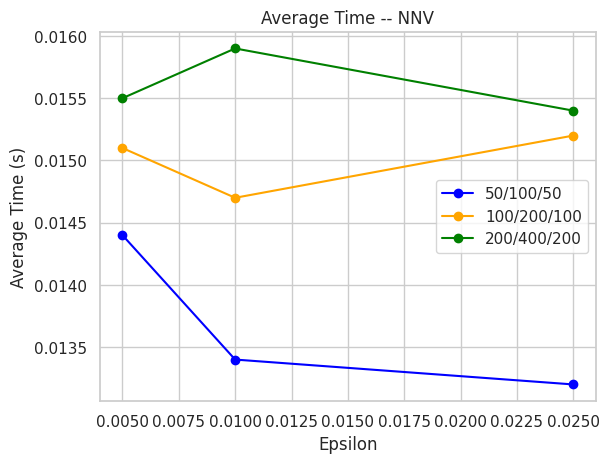

In [226]:
nnv_result
# Plot the average time
# Create a unique color for each model
model_colors = {'50/100/50': 'blue', '100/200/100': 'orange', '200/400/200': 'green'}

# Plot the average time for each model
for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=model_colors[model], marker='o', linestyle='-', label=model)

plt.xlabel('Epsilon')
plt.ylabel('Average Time (s)')
plt.title('Average Time -- NNV')
plt.legend()
plt.grid(linewidth=1)
plt.show()

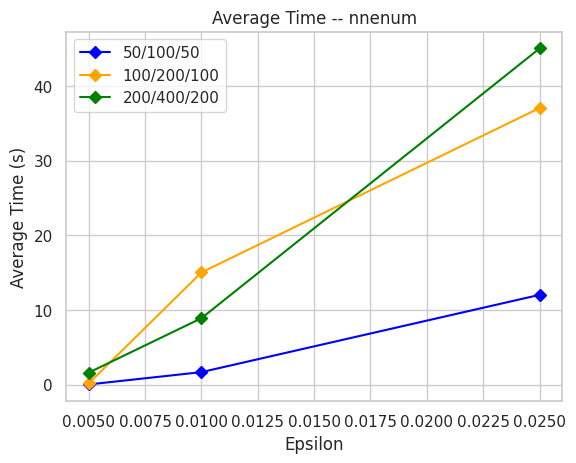

In [227]:
# nnv_result = nnenum_result
# Plot the average time
# Create a unique color for each model
model_colors = {'50/100/50': 'blue', '100/200/100': 'orange', '200/400/200': 'green'}

# Plot the average time for each model
for model in nnenum_result['model'].unique():
    model_data = nnenum_result[nnenum_result['model'] == model]
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=model_colors[model], marker='D', linestyle='-', label=model)

plt.xlabel('Epsilon')
plt.ylabel('Average Time (s)')
plt.title('Average Time -- nnenum')
plt.legend()
plt.grid(linewidth=1)
plt.show()

In [224]:
nnv_result

,model,tool,epsilon,Robust,Non-robust,AVG time (s)
0,50/100/50,nnv,0.005,76.52,23.49,0.0144
1,50/100/50,nnv,0.010,76.62,23.38,0.0134
2,50/100/50,nnv,0.025,76.84,23.16,0.0132
3,100/200/100,nnv,0.005,66.67,33.33,0.0151
4,100/200/100,nnv,0.010,66.78,33.23,0.0147
5,100/200/100,nnv,0.025,66.67,33.33,0.0152
6,200/400/200,nnv,0.005,49.13,50.87,0.0155
7,200/400/200,nnv,0.010,49.03,50.97,0.0159
8,200/400/200,nnv,0.025,48.70,51.30,0.0154


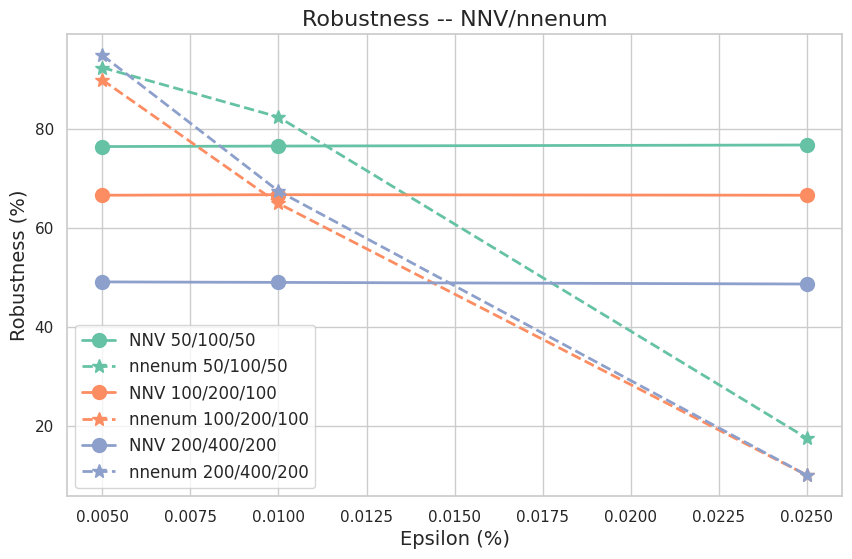

In [229]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme(style="whitegrid", palette="Set2")

# Assuming you have the data in DataFrames called 'nnv_result' and 'nnenum_result'
plt.figure(figsize=(10, 6))

for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    model_data_2 = nnenum_result[nnenum_result['model'] == model]
    
    # Use Seaborn's "colorblind" palette to get more distinguishable colors
    color = sns.color_palette("Set2")[list(nnv_result['model'].unique()).index(model)]
    
    plt.plot(model_data['epsilon'], model_data['Robust'], color=color, marker='o', markersize=10, linewidth=2, linestyle='-', label=f"NNV {model}")
    plt.plot(model_data_2['epsilon'], model_data_2['Robust'], color=color, marker='*', markersize=10, linewidth=2, linestyle='--', label=f"nnenum {model}")

plt.xlabel('Epsilon (%)', fontsize=14)
plt.ylabel('Robustness (%)', fontsize=14)
plt.title('Robustness -- NNV/nnenum', fontsize=16)
plt.legend(fontsize=12)
plt.grid(linewidth=1)
plt.show()